# Sentiment Analysis of Ben + Jerry' ice cream reviews

In [1]:
import pandas as pd
reviews = pd.read_csv('reviews.csv')
products = pd.read_csv('products.csv')

This Ben & Jerry's Ice Cream data refers to:


1.   Product details of different  flavours.
2.   Reviews relating to these different flavours.


#Products

In [2]:
products.head(3)

,key,name,subhead,description,rating,rating_count,ingredients
0,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."


In [3]:
products_ratings = products.groupby('key', as_index=False)['rating'].mean()
products_ratings.head(3)

,key,rating
0,0_bj,3.7
1,10_bj,4.7
2,11_bj,4.6


#Reviews

##Stars

In [91]:
reviews.head()

,key,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...


Products are grouped by their 'product key' and their average stars score is found

In [92]:
stars_ratings = reviews.groupby('key', as_index=False)['stars'].mean()

##Reviews text

Data reffering to whether a user comment was helpful is removed as it's not relevant in this analysis.

In [93]:
#remove title, helpful_yes, helpful_no, author
reviews.drop(['title', 'helpful_yes', 'helpful_no'], axis=1, inplace=True)

In [94]:
print(reviews.dtypes)

key       object
author    object
date      object
stars      int64
text      object
dtype: object


In [95]:
review_list = reviews['text'].tolist()

The review scores and sentiment ratings for each product are collected.

In [97]:
import nltk

#List for compound score of review
review_score_list = []

# Download the NLTK sentiment analysis models
nltk.download('vader_lexicon')

# Import the NLTK sentiment analysis module
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a new SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Iterate over the reviews and get the sentiment scores for each one
for review in review_list:
    # Get the sentiment scores for the review
    sentiment_score = sia.polarity_scores(review)

    #Add compound score to list
    review_score = sentiment_score['compound']
    review_score_list.append(review_score)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [98]:
len(review_score_list)

7943

The reviews dataset is amended so that it contains both a stars rating and a 'text_score' which indicates how positive/negative a user's written review was.

In [99]:
reviews['text_score'] = review_score_list
reviews.head(3)

,key,author,date,stars,text,text_score
0,0_bj,Ilovebennjerry,2017-04-15,3,"Super good, don't get me wrong. But I came for...",0.9663
1,0_bj,Sweettooth909,2020-01-05,5,I decided to try it out although I’m not a hug...,0.9459
2,0_bj,LaTanga71,2018-04-26,3,My caramel core begins to disappear about half...,0.7889


In [100]:
reviews_rating = reviews.groupby('key', as_index=False)['text_score'].mean()
reviews_rating.head(3)

,key,text_score
0,0_bj,0.509048
1,10_bj,0.743705
2,11_bj,0.580889


#Combine all _ratings

In [101]:
#Rating of review text
reviews_rating = reviews_rating.sort_values(by=['key'])
reviews_rating.head()

,key,text_score
0,0_bj,0.509048
1,10_bj,0.743705
2,11_bj,0.580889
3,12_bj,0.733183
4,13_bj,0.560860


In [102]:
reviews_rating.shape

(57, 2)

In [103]:
#Customer stars rating
stars_ratings = stars_ratings.sort_values(by=['key'])
stars_ratings.head()

,key,stars
0,0_bj,3.682692
1,10_bj,4.735135
2,11_bj,4.555556
3,12_bj,4.742857
4,13_bj,4.000000


In [104]:
stars_ratings.shape

(57, 2)

In [105]:
#B&J's own product rating
products_ratings = products_ratings.sort_values(by=['key'])
products_ratings.head()

,key,rating
0,0_bj,3.7
1,10_bj,4.7
2,11_bj,4.6
3,12_bj,4.7
4,13_bj,4.0


In [106]:
products_ratings.shape

(57, 2)

#Merge Dataframes

The dataframes are merged to create to allow for easier subsequent analysis.

Stars ratings are merged with the reviews rating.

In [107]:
overall_df = pd.merge(reviews_rating, stars_ratings,  left_index=True, right_index=True)

This data is merged with the Ben & Jerry's own product rating data.

In [108]:
final_df = pd.merge(overall_df, products_ratings, left_index=True, right_index=True)

In [109]:
final_df = final_df.rename(columns={'rating': 'company_rating'})

Stars and company rating are normalised so that the range has a maximum value of 1 compared to 5.

In [110]:
#Normalize stars column
final_df['stars'] = final_df['stars']/5

In [111]:
#Normalize company_rating column
final_df['company_rating'] = final_df['company_rating']/5

In [112]:
#Comapny rating are the same as stars rating so it's dropped
final_df.drop(columns=final_df.columns[-2:], axis=1, inplace=True)

Metrics 'stars-review' and 'stars/review' are created as these indicate the difference between users provided stars rating and the sentiment of their text review.

In [113]:
final_df['stars-review'] = final_df['stars'] - final_df['text_score']

In [114]:
final_df['stars/review'] = final_df['stars'] / final_df['text_score']

The below metric indicates that users are more 46.5% likely to rate ice-creams highly in the stars rating compared to their text response.

In [115]:
stars_higher_than_review = final_df['stars/review'].mean()
stars_higher_than_review

1.4653104890011743

In [116]:
mean_text_score = final_df['text_score'].mean()
mean_text_score

0.6028219768721719

In [117]:
list_a = [stars_higher_than_review, 1]
list_a

[1.4653104890011743, 1]

The plot below shows the discrepancy in stars scores compared to the sentiment of users review text.

<BarContainer object of 2 artists>

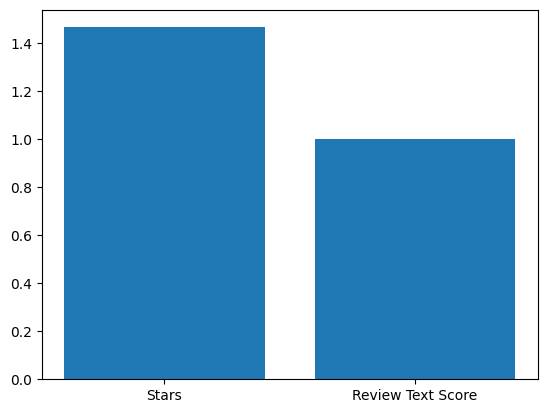

In [118]:
import matplotlib.pyplot as plt
stars = 1.4653104890011743
review = 1
xs = ['Stars', 'Review Text Score']
ys = [1.4653104890011743, 1]
plt.bar(xs, ys)


In [120]:
positive_text_reviews = final_df[final_df['text_score'] > mean_text_score]
positive_text_reviews.head(3)

,key_x,text_score,key_y,stars,stars-review,stars/review
1,10_bj,0.743705,10_bj,0.947027,0.203322,1.273390
3,12_bj,0.733183,12_bj,0.948571,0.215389,1.293772
7,16_bj,0.697406,16_bj,0.912065,0.214660,1.307798


In [121]:
negative_text_reviews = final_df[final_df['text_score'] < mean_text_score]
negative_text_reviews.head(3)

,key_x,text_score,key_y,stars,stars-review,stars/review
0,0_bj,0.509048,0_bj,0.736538,0.227490,1.446894
2,11_bj,0.580889,11_bj,0.911111,0.330222,1.568477
4,13_bj,0.560860,13_bj,0.800000,0.239140,1.426381


In [122]:
final_df.head()

,key_x,text_score,key_y,stars,stars-review,stars/review
0,0_bj,0.509048,0_bj,0.736538,0.227490,1.446894
1,10_bj,0.743705,10_bj,0.947027,0.203322,1.273390
2,11_bj,0.580889,11_bj,0.911111,0.330222,1.568477
3,12_bj,0.733183,12_bj,0.948571,0.215389,1.293772
4,13_bj,0.560860,13_bj,0.800000,0.239140,1.426381


A 'joint score' feature is created. This feature represents the average of the text and stars scores combined.

In [123]:
final_df['joint_score'] = (final_df['text_score'] + final_df['stars'])/2
final_df.head(3)

,key_x,text_score,key_y,stars,stars-review,stars/review,joint_score
0,0_bj,0.509048,0_bj,0.736538,0.227490,1.446894,0.622793
1,10_bj,0.743705,10_bj,0.947027,0.203322,1.273390,0.845366
2,11_bj,0.580889,11_bj,0.911111,0.330222,1.568477,0.746000


The 3 worst performing Ben and Jerry's ice creams when considering both stars given and review text are 'Chocolate Cookie Dough Core', 'Coffee Toffee Bar Crunch', 'Chocolate Fudge Brownie'.

In [124]:
small_data = final_df.nsmallest(5, ['joint_score'])
small_data = small_data.assign(Name = ['Chocolate Cookie Dough Core', 'Coffee Toffee Bar Crunch', 'Chocolate Fudge Brownie', 'Red, White & Blueberry', 'Chillin’ the Roast'])
small_data.head(3)

,key_x,text_score,key_y,stars,stars-review,stars/review,joint_score,Name
45,50_bj,0.218173,50_bj,0.366265,0.148092,1.678779,0.292219,Chocolate Cookie Dough Core
16,24_bj,0.299755,24_bj,0.584768,0.285014,1.950823,0.442261,Coffee Toffee Bar Crunch
8,17_bj,0.382475,17_bj,0.675490,0.293015,1.766101,0.528983,Chocolate Fudge Brownie


In [125]:
big_names = ['Ice Cream Sammie', 'Cold Brew Caramel', 'Sweet like Sugar Cookie Dough Core', 'Glampfire Trail Mix', 'Americone Dream' ]

The 5 best performing Ben and Jerry's ice creams when considering both stars given and review text are 'Ice Cream Sammie', 'Cold Brew Caramel', 'Sweet like Sugar Cookie Dough Core', 'Glampfire Trail Mix', 'Americone Dream'.

In [126]:
big_data = final_df.nlargest(5, ['joint_score'])
big_data = big_data.assign(Name= ['Ice Cream Sammie', 'Cold Brew Caramel', 'Sweet like Sugar Cookie Dough Core', 'Glampfire Trail Mix', 'Americone Dream' ])
big_data

,key_x,text_score,key_y,stars,stars-review,stars/review,joint_score,Name
21,29_bj,0.815890,29_bj,0.993548,0.177658,1.217747,0.904719,Ice Cream Sammie
17,25_bj,0.865430,25_bj,0.920000,0.054570,1.063055,0.892715,Cold Brew Caramel
46,51_bj,0.749039,51_bj,0.956098,0.207059,1.276432,0.852568,Sweet like Sugar Cookie Dough Core
19,27_bj,0.757562,27_bj,0.944118,0.186556,1.246258,0.850840,Glampfire Trail Mix
1,10_bj,0.743705,10_bj,0.947027,0.203322,1.273390,0.845366,Americone Dream


The mean stars from the reviews classed as both positive and negative are found. The expectation would be that those reviews classed as positive have a higher average star rating than those classed as positve.

In [127]:
positive_mean_stars = positive_text_reviews['stars'].mean()
positive_mean_stars

0.9260304374741323

In [128]:
negative_mean_stars = negative_text_reviews['stars'].mean()
negative_mean_stars

0.7842705847965487

The above results show that generally speaking those reviews highly rated also have more positive text reviews which is to be expected. Interestingly, review text with negative connatations score 0.784 or nearly 4 stars.

While reviews with positive connotations are found to be more likely to be rated highly, the stars rating does not always appear to correlate with the review score.

This highlights the importance for companies, Ben and Jerry's in this case, to consider customer reviews as well as stars ratings when evaluating product performance. Sentiment Analysis has provided a solution to understanding of a customers true reaction to a product.

In conclusion Ben and Jerry's are advised to not look at stars ratings in isolation and to also consider customer reviews when evaluationg product performance. They may also wish to consider acting upon the most poorly performing products in this analysis and either removing them from their product line or changing them to garner more positive reviews.